In [152]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('IA3-1.csv')

In [3]:
df.head()

,description,Maker_Model
0,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series M
1,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series
2,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series
3,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series
4,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series


In [12]:
df_desc= df['description']
df_desc

0        premium unleaded (required),MANUAL,rear wheel ...
1        premium unleaded (required),MANUAL,rear wheel ...
2        premium unleaded (required),MANUAL,rear wheel ...
3        premium unleaded (required),MANUAL,rear wheel ...
4        premium unleaded (required),MANUAL,rear wheel ...
                               ...                        
11909    premium unleaded (required),AUTOMATIC,all whee...
11910    premium unleaded (required),AUTOMATIC,all whee...
11911    premium unleaded (required),AUTOMATIC,all whee...
11912    premium unleaded (recommended),AUTOMATIC,all w...
11913    regular unleaded,AUTOMATIC,front wheel drive,L...
Name: description, Length: 11914, dtype: object

1) Prepare the data for a gensim Word2Vec model 

#I have cleaned and preprocessed the data for a gensim word2vec model

In [216]:
import nltk
from nltk.corpus import stopwords

def preprocess_text(text):
    text_list = text.split(',')
    processed_df = []
    for doc in text_list:
        tokens = nltk.word_tokenize(doc.lower())
        tokens = [token for token in tokens if not token in stopwords.words('english')]
        processed_df.append(" ".join(tokens))
    return processed_df  
preprocessed_data = [preprocess_text(text) for text in df_desc]
print(preprocessed_data)


[['premium unleaded ( required )', 'manual', 'rear wheel drive', 'factory tuner', 'luxury', 'high-performance', 'compact', 'coupe', 'bmw 1 series'], ['premium unleaded ( required )', 'manual', 'rear wheel drive', 'luxury', 'performance', 'compact', 'convertible', 'bmw 1 series'], ['premium unleaded ( required )', 'manual', 'rear wheel drive', 'luxury', 'high-performance', 'compact', 'coupe', 'bmw 1 series'], ['premium unleaded ( required )', 'manual', 'rear wheel drive', 'luxury', 'performance', 'compact', 'coupe', 'bmw 1 series'], ['premium unleaded ( required )', 'manual', 'rear wheel drive', 'luxury', 'compact', 'convertible', 'bmw 1 series'], ['premium unleaded ( required )', 'manual', 'rear wheel drive', 'luxury', 'performance', 'compact', 'coupe', 'bmw 1 series'], ['premium unleaded ( required )', 'manual', 'rear wheel drive', 'luxury', 'performance', 'compact', 'convertible', 'bmw 1 series'], ['premium unleaded ( required )', 'manual', 'rear wheel drive', 'luxury', 'high-perform

2) Run the model (with size = 50)  and display the vector for ‘Toyota Camry’) 

In [230]:
model = gensim.models.Word2Vec(preprocessed_data,vector_size=50, window=3, min_count=1, workers=3,sg=1)
vector = model.wv['toyota camry']
print(vector)

[-3.8841747e-02  6.3781418e-02  5.9357349e-02 -3.2561716e-02
 -2.9565005e-02 -2.6049960e-01  6.6469312e-02  1.8794489e-01
 -1.8268575e-01 -1.4237252e-01 -7.9461940e-02 -1.0984404e-01
  6.7630365e-02 -3.4684088e-02  4.1796606e-02 -5.8558024e-02
  1.7510530e-01  1.1207417e-01 -2.1172129e-01 -3.3339238e-01
 -5.0451316e-02  3.1904157e-02  2.3438324e-01 -5.8232088e-02
  3.6973953e-02 -1.3628134e-01  5.4133765e-02  2.3355620e-01
  3.4807935e-02 -7.7228084e-02  5.7168838e-02  2.6536541e-02
  4.8293039e-02 -2.0274958e-02 -8.6349502e-02 -9.8058075e-02
  2.2683288e-01 -5.2897215e-02  4.1538484e-02  6.4438810e-03
  1.1554738e-01 -7.3763445e-02 -6.9061711e-02  2.3390414e-02
  4.2963168e-01  2.6014191e-04 -1.7538415e-02 -1.9462293e-01
 -7.7667031e-03  4.6834465e-02]


3) Compute the similarity between 'Porsche 718 Cayman' and 'Nissan Van' 

In [231]:
similarity = model.wv.similarity('porsche 718 cayman','nissan van')
print(similarity)

0.81713337


4) Find the five most similar to 'Mercedes-Benz SLK-Class' 

In [232]:
model.wv.most_similar('mercedes-benz slk-class')[:5]

[('mercedes-benz sl-class', 0.9934491515159607),
 ('lamborghini murcielago', 0.9913637042045593),
 ('infiniti g convertible', 0.9873680472373962),
 ('lotus evora', 0.9846557378768921),
 ('pontiac solstice', 0.984641432762146)]

5) Generate a t-SNE graph for a list of 50 unique cars.  

In [233]:
last_items = []

for car in preprocessed_data:
    string = car[-1]
    last_item = string.split(",")[-1].strip()
    last_items.append(last_item)
#print(last_items)

last_items = np.array(last_items)
random_indices = np.random.choice(len(last_items), size=50, replace=False)
unique_res = last_items[random_indices]
print(unique_res)

['ferrari 360' 'dodge durango' 'mazda mx-3' 'kia sorento' 'audi rs 6'
 'chevrolet s-10' 'volkswagen new beetle' 'bmw 4 series gran coupe'
 'ford mustang' 'chevrolet c/k 2500 series' 'gmc sierra 1500' 'gmc sonoma'
 'lincoln ls' 'subaru xv crosstrek' 'volkswagen cc' 'nissan 350z'
 'mercedes-benz e-class' 'nissan 370z' 'mercedes-benz m-class'
 'bmw 3 series' 'dodge dart' 'toyota tundra' 'ford transit wagon'
 'suzuki aerio' 'infiniti qx56' 'buick verano' 'volvo v50'
 'lamborghini gallardo' 'chrysler sebring' 'chevrolet sonic'
 'toyota tacoma' 'toyota tundra' 'land rover lr3' 'chrysler pacifica'
 'hummer h3t' 'ferrari 458 italia' 'cadillac cts' 'acura rdx' 'mazda cx-3'
 'chevrolet cruze' 'volkswagen cc' 'saab 9-3 griffin' 'dodge dakota'
 'plymouth grand voyager' 'acura rdx' 'toyota pickup' 'lincoln aviator'
 'oldsmobile achieva' 'suzuki esteem' 'audi q7']


In [234]:
from sklearn.manifold import TSNE

car_vectors = model.wv.__getitem__(unique_res)

# Use t-SNE to reduce the dimensionality of the vectors to 2D
tsne = TSNE(n_components=2, random_state=42)
car_tsne = tsne.fit_transform(car_vectors)

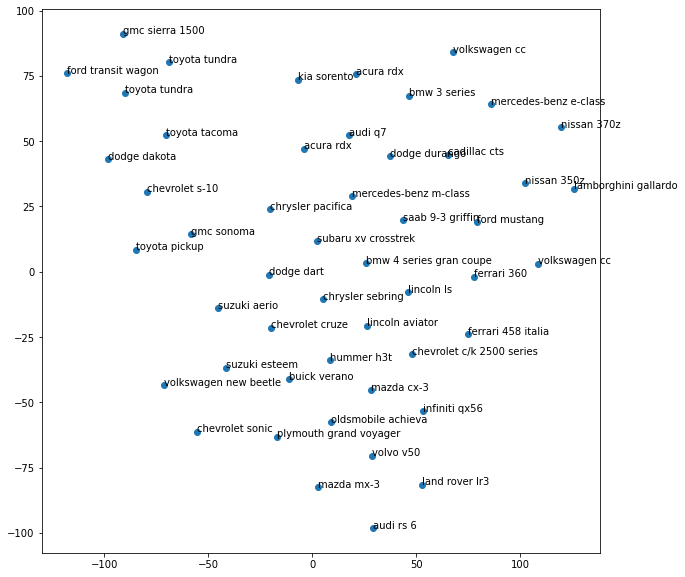

In [235]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(car_tsne[:, 0], car_tsne[:, 1])
for i, car in enumerate(unique_res):
    plt.annotate(car, xy=(car_tsne[i, 0], car_tsne[i, 1]))

plt.savefig("tsne-quotes.png")
plt.show()